# Uses LSTM to predict the closing stock price

In [1]:
# import the libraries
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Using TensorFlow backend.


In [2]:
df = pd.read_csv('BTCUSDT.csv')
df.head(5)

,Date,Open,Hight,Low,Close,Volume,Quote_Volume,Trades_Count,VolumeGain,pricegain
0,2021-04-11 16:24:00,59629.99,59663.25,59629.99,59654.68,15.091025,9.000868e+05,1138,0.000000,0.000000
1,2021-04-11 16:25:00,59656.94,59656.95,59605.73,59644.97,20.839013,1.242747e+06,1317,32.258796,0.045195
2,2021-04-11 16:26:00,59644.96,59644.97,59620.01,59629.62,21.027227,1.253855e+06,1171,0.889881,-0.020081
3,2021-04-11 16:27:00,59629.62,59639.59,59581.66,59612.66,26.626219,1.587318e+06,1256,23.582339,-0.025719
4,2021-04-11 16:28:00,59612.67,59630.49,59567.01,59567.01,20.770259,1.237983e+06,1219,-24.856293,-0.028425


In [3]:
#Get the number of rows and columns in the data set
df.shape

(1320, 10)

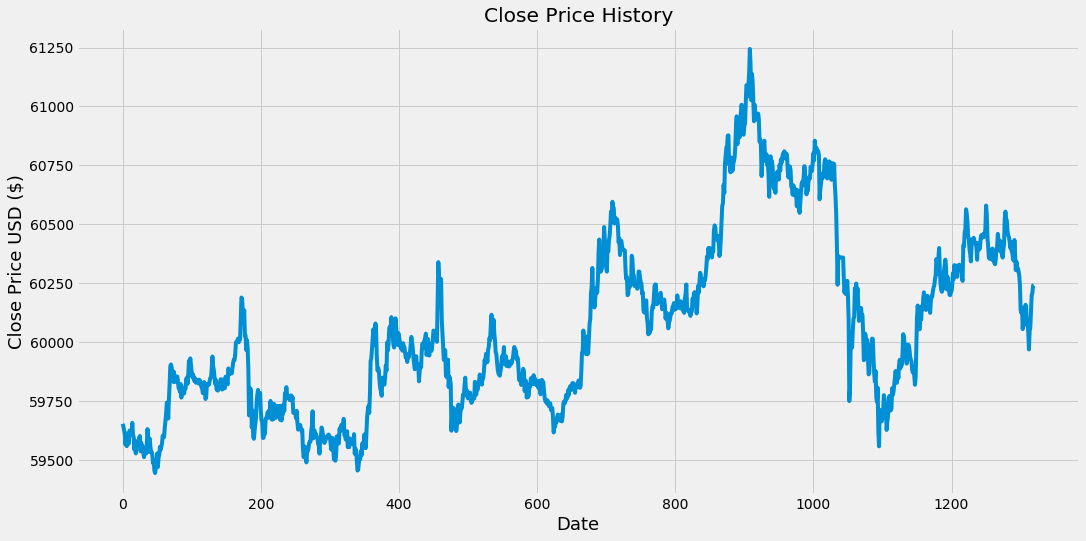

In [4]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df.Close)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [5]:
#Create a new dataframe with pnly the 'Close' column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values

In [6]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaler = scaler.fit(dataset)
scaler_data = scaler.transform(dataset)

In [7]:
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)* .8)
#Create the traning and testing data set
train_data = scaler_data[0:training_data_len, :] 
test_data = scaler_data[training_data_len: , :]

x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

x_test= []
y_test = []
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])
    y_test.append(test_data[i,0])

In [8]:
#Convert the x_train,y_train, x_test, and y_test to numpy arrays
x_train, y_train, x_test, y_test = np.array(x_train), np.array(y_train), np.array(x_test), np.array(y_test)

In [9]:
#Reshape the data (x_train and x_test) for to adapt it to the input of LSTM
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))

In [10]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(60, return_sequences=True, input_shape=(x_train.shape[1],1)))
#model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [11]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
#Train the model
model.fit(x_train, y_train, batch_size=int(len(x_train)/4), epochs=50)

Epoch 1/50
996/996 [==============================] - 15s 15ms/step - loss: 0.0674
Epoch 2/50
996/996 [==============================] - 8s 8ms/step - loss: 0.0216
Epoch 3/50
996/996 [==============================] - 8s 8ms/step - loss: 0.0091
Epoch 4/50
996/996 [==============================] - 13s 13ms/step - loss: 0.0120
Epoch 5/50
996/996 [==============================] - 14s 14ms/step - loss: 0.0084
Epoch 6/50
996/996 [==============================] - 7s 7ms/step - loss: 0.0048
Epoch 7/50
996/996 [==============================] - 8s 8ms/step - loss: 0.0056
Epoch 8/50
996/996 [==============================] - 8s 8ms/step - loss: 0.0035
Epoch 9/50
996/996 [==============================] - 8s 8ms/step - loss: 0.0038
Epoch 10/50
996/996 [==============================] - 11s 11ms/step - loss: 0.0032
Epoch 11/50
996/996 [==============================] - 6s 6ms/step - loss: 0.0030
Epoch 12/50
996/996 [==============================] - 6s 6ms/step - loss: 0.0030
Epoch 13/50
996/9

In [13]:
#Get the model predicted price values
predictions = model.predict(x_test)

In [14]:
#Get the root mean squart error(RMSE)
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

0.008542081284675611

In [15]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:len(data)-60]
predictions = scaler.inverse_transform(predictions)
valid['Predictions'] = predictions

C:\Users\Hiri\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


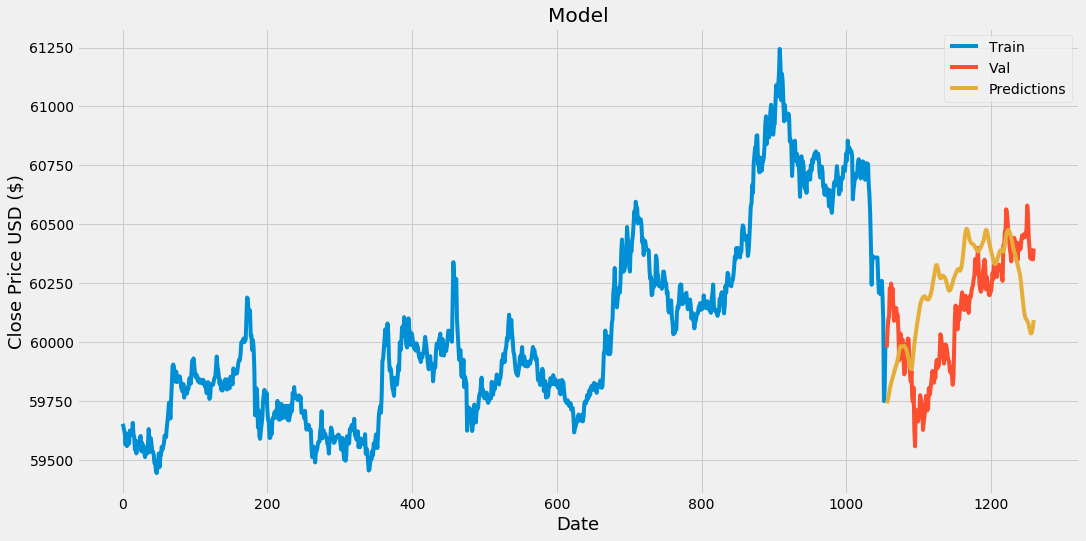

In [16]:
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Predictions'])
plt.show()